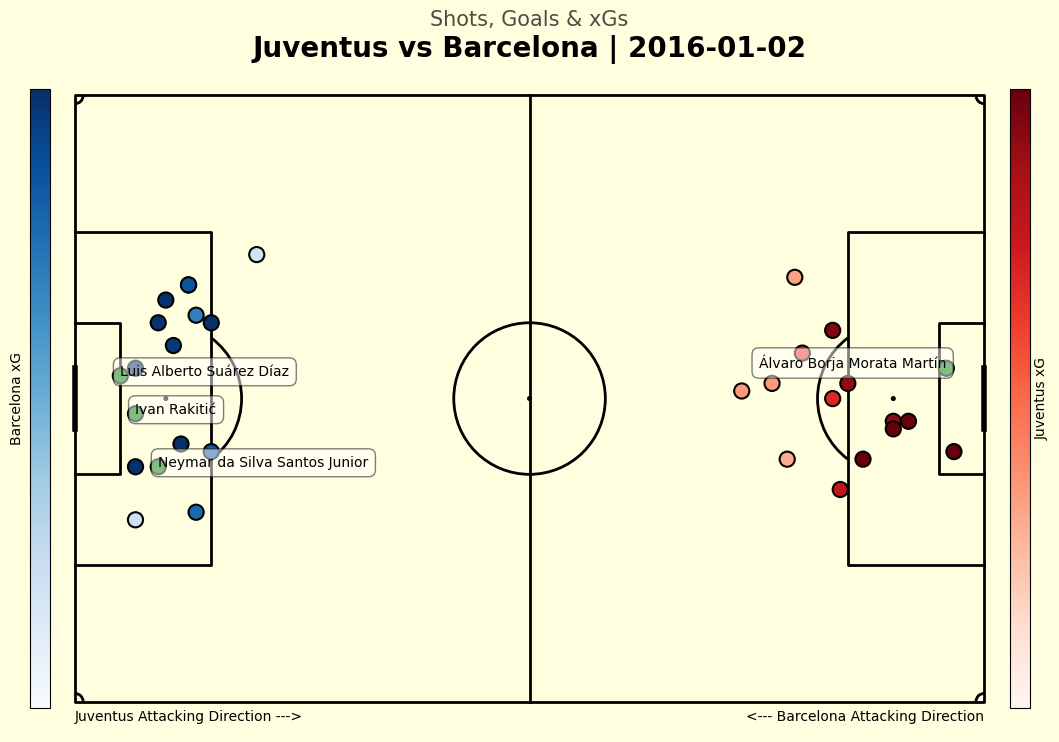

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
from mplsoccer import Sbopen
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.cm import ScalarMappable
from adjustText import adjust_text
import seaborn as sns

parser = Sbopen()
df_match = parser.match(competition_id=16, season_id=26)
final_matches = df_match.copy()
final_lineups = []
for i in final_matches.match_id:
    final_lineups.append(parser.lineup(i))
final_lineups = pd.concat(final_lineups)
df_event, df_related, df_freeze, df_tactics = parser.event(18242)
df_event = df_event.merge(final_lineups[['player_id','player_nickname']],on="player_id",how="left")

pitch_gray = Pitch(pitch_type="statsbomb",pitch_color='#C1C1C1', line_color='black', stripe=False, corner_arcs=True,line_zorder=2)

match_id_required = 3754146
home_team_required = final_matches.home_team_name[0]
away_team_required = final_matches.away_team_name[0]
pitchLengthX = 120
pitchWidthY = 80
shots = df_event[df_event.type_name == 'Shot']

figSizeX = 10
figSizeY = 7.727
fig, ax = pitch_gray.draw(figsize=(figSizeX, figSizeY))
home_team_required
#fig, ax1 = pitch_gray.draw(figsize=(10, 7.727))
fig.set_facecolor('#FFFEDF')
ax.patch.set_facecolor('#FFFEDF')



plt.Circle((114,50),4,color="blue",zorder=6)
plt.annotate("",(0,-1))
plt.annotate(f"{home_team_required} Attacking Direction --->",(0,82.5))
plt.annotate(f"<--- {away_team_required} Attacking Direction", xy=(120, 82.5), horizontalalignment='right')
goal_coor = []

# create lists to store text annotations
home_goal_annotations = []
away_goal_annotations = []

# loop through shots and plot them
for i, shot in shots.iterrows():
    x = shot.x
    y = shot.y
    goal = shot.outcome_name == 'Goal'
    team_name = shot.team_name
    circleRadius = figSizeX * 0.1
    circleLineWidth = circleRadius * 1.5
    
    if team_name == home_team_required:
        if goal:
            goal_coor.append((x, y))
            shotCircle = mpatches.Circle((x, y), radius=circleRadius, facecolor='green', edgecolor="k", linewidth=circleLineWidth, zorder=6)
            ax.add_patch(shotCircle)
            plt.annotate(shot.player_name,(x, y),bbox=dict(facecolor='white', alpha=0.5, boxstyle="round,pad=0.5"),zorder=7,ha='right')
            # store goal scorer's name for annotation
            home_goal_annotations.append((shot.player_name, x - 1, y + 1))
        else:
            cmap = plt.get_cmap('Reds')
            shotCircle = mpatches.Circle((x,y), radius=circleRadius, edgecolor="k", linewidth=circleLineWidth, facecolor=cmap(shot.shot_statsbomb_xg * 15), zorder=6)
            ax.add_patch(shotCircle)
    elif team_name == away_team_required:
        if goal:
            shotCircle = plt.Circle((pitchLengthX - x, pitchWidthY-y), radius=circleRadius, facecolor='green', edgecolor="k", linewidth=circleLineWidth, zorder=6)
            ax.add_patch(shotCircle)
            # Store goal scorer's name for annotation
            plt.annotate(shot.player_name,(pitchLengthX - x, pitchWidthY-y),bbox=dict(facecolor='white', alpha=0.5, boxstyle="round,pad=0.5"),zorder=7)
            away_goal_annotations.append((shot.player_name, pitchLengthX - x - 1, y + 1))
        else:
            cmap = plt.get_cmap('Blues')
            shotCircle = mpatches.Circle((pitchLengthX - x, y), radius=circleRadius, edgecolor="k", linewidth=circleLineWidth, facecolor=cmap(shot.shot_statsbomb_xg * 15), zorder=6)
            ax.add_patch(shotCircle)
            
#adjust_text([plt.text(x, y, name, ha='right', va='bottom', zorder=7, bbox=dict(facecolor='white', alpha=0.5, boxstyle="round,pad=0.5")) for name, x, y in home_goal_annotations], autoalign='x', only_move={'points':'y', 'text':'y'})
#adjust_text([plt.text(x, y, name, ha='right', va='bottom', zorder=7, bbox=dict(facecolor='white', alpha=0.5, boxstyle="round,pad=0.5")) for name, x, y in away_goal_annotations], autoalign='x', only_move={'points':'y', 'text':'y'})


# access legend objects automatically created from data
handles, labels = plt.gca().get_legend_handles_labels()

# create manual symbols for legend
patch = mpatches.Patch(color='grey', label='manual patch')   
line = Line2D([0], [0], label='manual line', color='k')
point = Line2D([0], [0], label='manual point', marker='s', markersize=10, 
         markeredgecolor='r', markerfacecolor='k', linestyle='')
circ = mpatches.Circle((0,0), radius=circleRadius,edgecolor="k", linewidth=circleRadius*1.5)
# add manual symbols to auto legend
handles.extend([patch, line, point,circ])

# create a colorbar for leicester city ('blues') on the left side
cmap_blue = plt.get_cmap('Blues')
norm_blue = plt.Normalize(vmin=0, vmax=1)  # modify the limits as needed
sm_blue = ScalarMappable(cmap=cmap_blue, norm=norm_blue)
sm_blue.set_array([])

# create a separate axis for the leicester city colorbar
cbar_ax_blue = fig.add_axes([0.0,0.1,0.02,.8])  # adjust the position and size as needed
cbar_blue = plt.colorbar(sm_blue, cax=cbar_ax_blue)
cbar_blue.set_ticks([])  # Remove the ticks and numbers
cbar_blue.ax.yaxis.set_label_position('left')  # move the label to the left side of the colorbar
cbar_blue.set_label(f'{away_team_required} xG')

# create a colorbar for bournemouth ('reds') on the right side
cmap_red = plt.get_cmap('Reds')
norm_red = plt.Normalize(vmin=0, vmax=1)  # modify the limits as needed
sm_red = ScalarMappable(cmap=cmap_red, norm=norm_red)
sm_red.set_array([])

# create a separate axis for the bournemouth colorbar
cbar_ax_red = fig.add_axes([0.98, 0.1, 0.02, 0.8])  # adjust the position and size as needed
cbar_red = plt.colorbar(sm_red, cax=cbar_ax_red)
cbar_red.set_ticks([])  # remove the ticks and numbers
cbar_red.set_label(f'{home_team_required} xG')
ax.set_title(f"{home_team_required} vs {away_team_required} | 2016-01-02", fontsize=20, fontweight='bold', loc='center')
fig.text(0.5, 0.99, "Shots, Goals & xGs", ha='center', va='center', fontsize=15, alpha=0.7)
# show the plot
plt.show()
#plt.legend(handles=handles)